In [23]:
import requests
import json
import time
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
Notre projet portera sur le jeu League of Legends. C’est un jeu d’équipe en ligne
en 5 contre 5. Vous pouvez si vous le souhaitez regarder un tutoriel de 3 minutes
si vous avez envie de vous familiariser avec le jeu pour avoir une meilleure
compréhension globale sur le thème de notre projet.
https://www.youtube.com/watch?v=0MEOdboHk8o&ab_channel=GentleMates

# 1 - Collection de notre jeu de données

Pour collecter nos données, nous sommes directement allés les chercher à la source en se branchant à l’api du jeu. On y récupère les noms des meilleurs joueurs du serveur européen. On fait ce choix car ces parties de haut niveaux sont moins hasardeuses et il en découlera des données plus fiables.

Il faut aussi prendre en compte les restrictions de l’api concernant le nombre de requêtes, on a pour cela créé plusieurs comptes particuliers afin de faire des requêtes en parrallèles sur plus de comptes.

Nous avons séparé tout le processus de requêtes api dans le fichier api_process. Ce fichier contiendra le code en rapport direct avec les jalons et le rendu final du projet.

# Update jalon 2 : 
Même si nous en avions l'intuition, prédire l'issue d'une partie en prenant ses caractéristiques à l'instant final de la partie était trop simple (environ 1 d'accuracy dès la régression logistique en cross validation).

On revoit donc tout le data set pour prendre des informations à un instant t (exemple ici : 15 minutes) de la partie pour en prédire son issue. On aura donc des résultats plus pertinents avec une vraie utilité avec un peu plus de challenge

Le processus de récolte de données, de filtrage des parties de moins de 15 minutes etc.. est disponible dans le notebook api_processs. 

On a gardé une trace de nos anciennes accuracys dans le fichier accuracy_with_single_feature.txt .



In [6]:
matchs_info_df1 = pd.read_csv('data_15min.csv') #import of dataset created by api_process.ipynb
matchs_info_df2 = pd.read_csv('data_15min2.csv') #import of dataset created by api_process.ipynb
matchs_info_df = pd.concat([matchs_info_df1, matchs_info_df2], ignore_index=True) #concatenation of the two datasets

In [8]:
matchs_info_df

,winningTeam,Team1.championStats.abilityHaste,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.armorPen,Team1.championStats.armorPenPercent,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.bonusArmorPenPercent,Team1.championStats.bonusMagicPenPercent,...,Team2.goldPerSecond,Team2.jungleMinionsKilled,Team2.level,Team2.minionsKilled,Team2.participantId,Team2.position.x,Team2.position.y,Team2.timeEnemySpentControlled,Team2.totalGold,Team2.xp
0,1,0,177,352,0,0,628,817,0,0,...,50,100,47,421,40,58227,25880,1049805,24603,29860
1,1,0,185,446,0,0,551,618,0,0,...,50,95,46,402,40,44645,41057,395210,27729,30281
2,1,0,186,466,0,0,603,826,0,0,...,50,104,49,389,40,39313,27933,730043,31166,31966
3,0,0,195,307,0,0,746,945,0,0,...,50,107,48,385,40,43743,50106,957390,30368,32863
4,1,0,230,348,0,30,759,635,0,0,...,50,83,46,370,40,49966,24051,725235,28765,29713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1,0,334,307,0,0,867,512,0,0,...,50,90,46,369,40,50322,38622,850247,25296,29973
9814,1,0,225,362,0,0,664,692,0,0,...,50,101,47,366,40,42486,54985,568203,29257,30016
9815,0,0,456,380,0,0,817,818,0,0,...,50,76,42,352,40,58954,56762,152030,27287,25950
9816,1,0,188,393,0,0,651,798,0,0,...,50,88,47,325,40,15059,48839,452886,28472,30051


In [11]:
#final csv
matchs_info_df.to_csv('data_15min_final.csv', index=False) #export of the final dataset

# Visualisation du dataset

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [40]:
data = pd.read_csv('data_15min_final.csv')
target = data['winningTeam']

In [41]:
target

0       1
1       1
2       1
3       0
4       1
       ..
9813    1
9814    1
9815    0
9816    1
9817    0
Name: winningTeam, Length: 9818, dtype: int64

In [43]:
data_to_display = data[data.columns[:len(data.columns)//2]] #For histogram display, we dont want to display red team stats
data_sample = data.sample(2000) #Sample 2000 rows to work with
data_to_display

,winningTeam,Team1.championStats.abilityHaste,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.armorPen,Team1.championStats.armorPenPercent,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.bonusArmorPenPercent,Team1.championStats.bonusMagicPenPercent,...,Team1.damageStats.trueDamageTaken,Team1.goldPerSecond,Team1.jungleMinionsKilled,Team1.level,Team1.minionsKilled,Team1.participantId,Team1.position.x,Team1.position.y,Team1.timeEnemySpentControlled,Team1.totalGold
0,1,0,177,352,0,0,628,817,0,0,...,152,50,107,50,425,15,54459,18759,441764,27130
1,1,0,185,446,0,0,551,618,0,0,...,1419,50,86,45,344,15,23850,36382,1151250,24094
2,1,0,186,466,0,0,603,826,0,0,...,918,50,66,44,324,15,58117,13286,638738,26168
3,0,0,195,307,0,0,746,945,0,0,...,1484,50,104,47,386,15,30790,24223,574770,28537
4,1,0,230,348,0,30,759,635,0,0,...,764,50,95,47,392,15,43556,28191,642631,28091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1,0,334,307,0,0,867,512,0,0,...,392,50,124,47,420,15,33904,26626,350953,28695
9814,1,0,225,362,0,0,664,692,0,0,...,629,50,103,46,416,15,31611,42397,843557,28729
9815,0,0,456,380,0,0,817,818,0,0,...,816,50,120,51,350,15,40994,43493,1393014,37768
9816,1,0,188,393,0,0,651,798,0,0,...,2738,50,86,47,367,15,21744,36784,804861,29872


# Histogrammes 

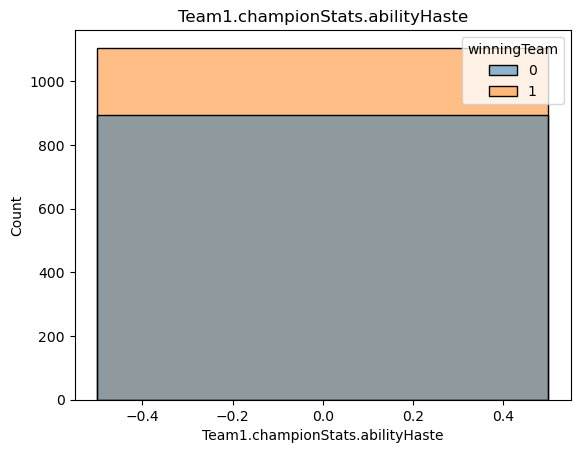

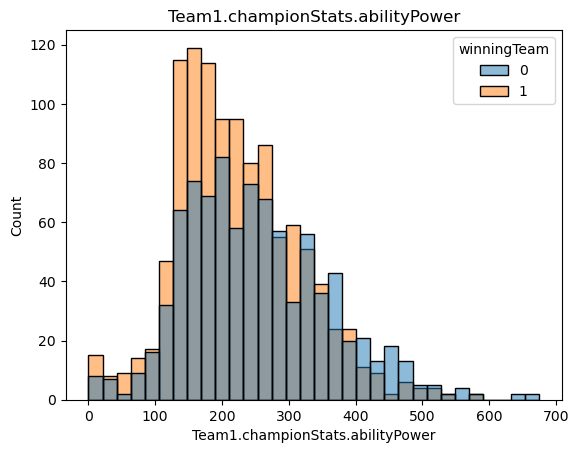

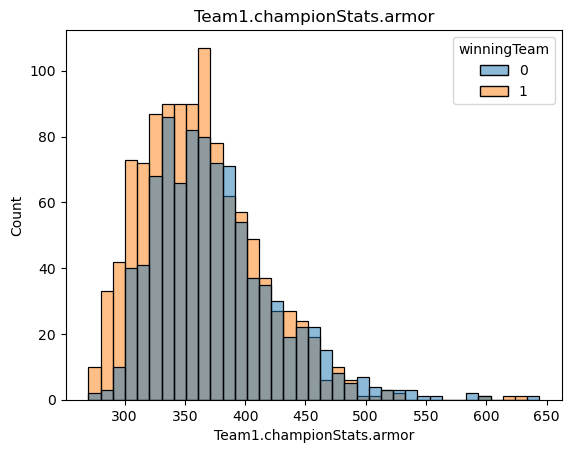

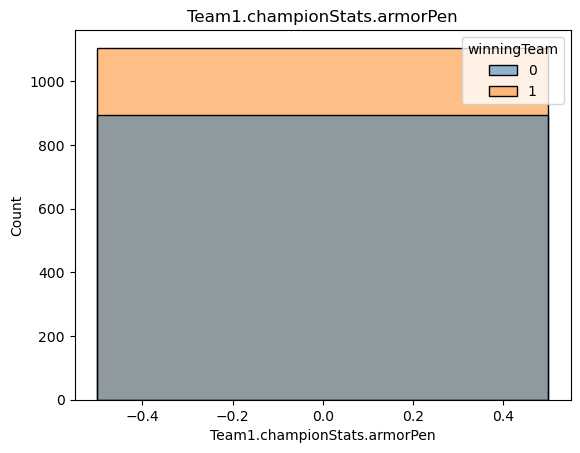

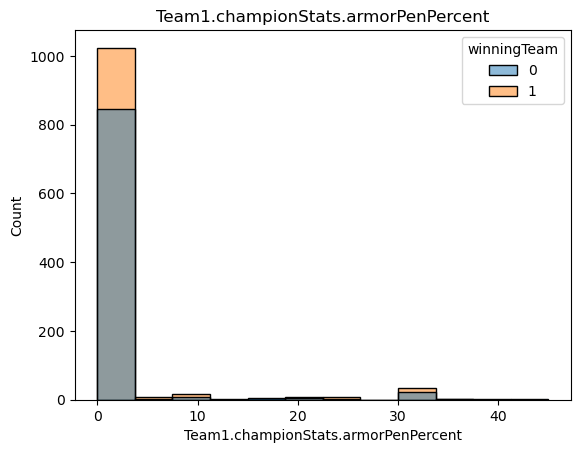

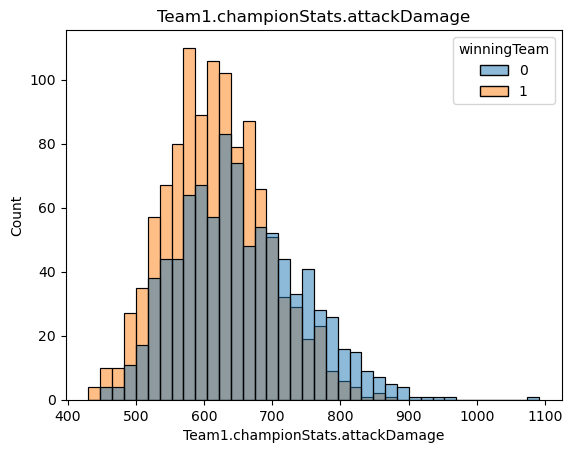

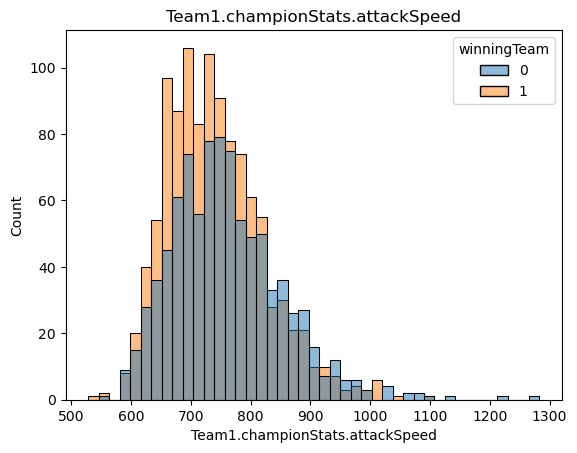

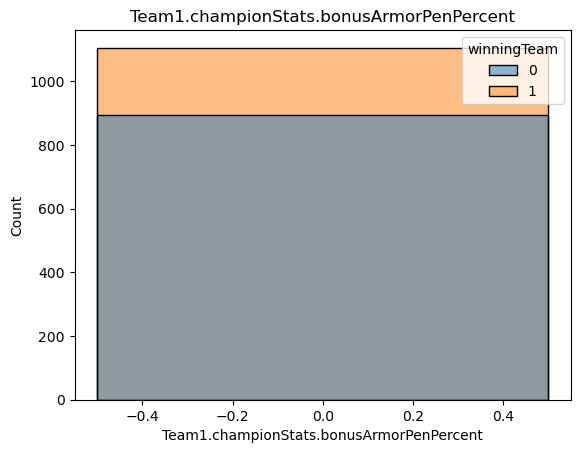

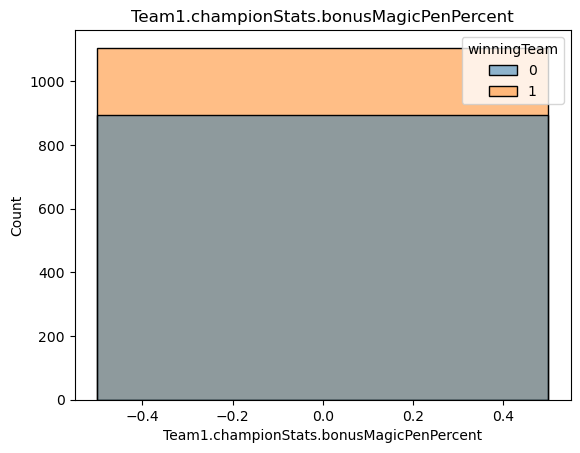

In [44]:
#We take the first half of the dataset to display variables distribution with seaborn
#display the distribution of the variables

plt.figsize=(20,20)
for col in data_to_display.columns[1:10]: #We display from column 1 to 10
    sns.histplot(data_sample, x=col, hue=target)
    plt.title(col)
    plt.show()

In [45]:
data_to_display.describe()

,winningTeam,Team1.championStats.abilityHaste,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.armorPen,Team1.championStats.armorPenPercent,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.bonusArmorPenPercent,Team1.championStats.bonusMagicPenPercent,...,Team1.damageStats.trueDamageTaken,Team1.goldPerSecond,Team1.jungleMinionsKilled,Team1.level,Team1.minionsKilled,Team1.participantId,Team1.position.x,Team1.position.y,Team1.timeEnemySpentControlled,Team1.totalGold
count,9818.000000,9818.0,9818.000000,9818.000000,9818.0,9818.000000,9818.000000,9818.000000,9818.0,9818.0,...,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.0,9818.000000,9818.000000,9.818000e+03,9818.000000
mean,0.553982,0.0,235.988389,367.605419,0.0,1.377776,633.077205,750.664799,0.0,0.0,...,1436.848951,50.133428,89.129151,46.261764,369.117743,15.0,32020.144530,32236.152577,6.547070e+05,28167.073437
std,0.497103,0.0,102.364094,51.235050,0.0,5.749763,80.809331,85.775827,0.0,0.0,...,1075.316464,2.729255,14.196335,1.814491,30.717858,0.0,9027.114545,8659.231026,2.853515e+05,2725.174110
min,0.000000,0.0,0.000000,263.000000,0.0,0.000000,410.000000,512.000000,0.0,0.0,...,0.000000,0.000000,1.000000,36.000000,238.000000,15.0,4415.000000,4377.000000,8.391000e+04,19160.000000
25%,0.000000,0.0,161.000000,331.000000,0.0,0.000000,575.000000,690.000000,0.0,0.0,...,676.000000,50.000000,80.000000,45.000000,349.000000,15.0,25814.500000,26461.000000,4.712805e+05,26252.000000
50%,1.000000,0.0,222.000000,360.000000,0.0,0.000000,628.000000,740.000000,0.0,0.0,...,1128.000000,50.000000,89.000000,46.000000,370.000000,15.0,31700.000000,32008.000000,6.076975e+05,27953.500000
75%,1.000000,0.0,299.000000,395.000000,0.0,0.000000,683.000000,799.000000,0.0,0.0,...,1923.000000,50.000000,98.000000,47.000000,390.000000,15.0,37750.750000,37707.750000,7.721850e+05,29855.000000
max,1.000000,0.0,776.000000,726.000000,0.0,48.000000,1092.000000,1283.000000,0.0,0.0,...,8580.000000,100.000000,144.000000,53.000000,465.000000,15.0,68879.000000,66289.000000,3.572988e+06,41031.000000


In [46]:
def plot_custom_graph(title, data_sample, col , xlabel, ylabel):
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.scatter(data_sample["Team1."+col], data_sample["Team2."+col], c=data_sample["winningTeam"], cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(['Blue team wins', 'Red team wins']) 
    plt.show()


# Graphs

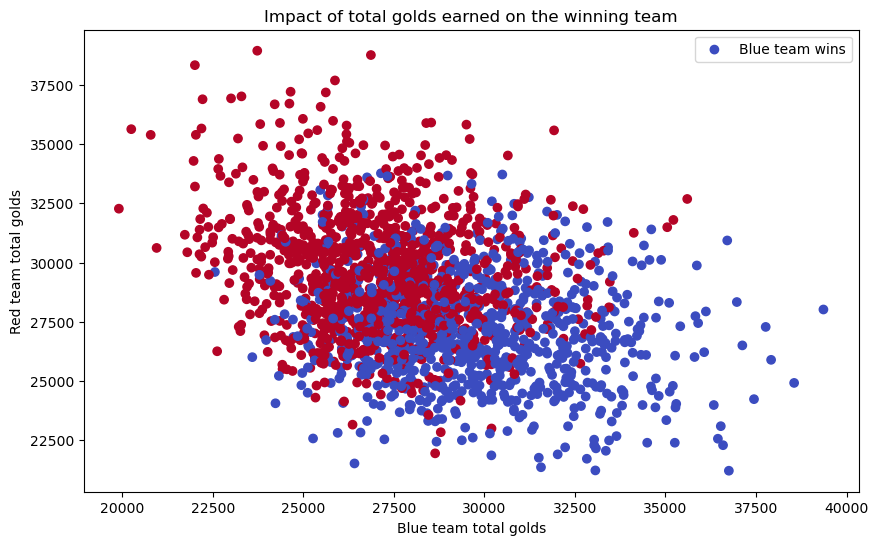

In [47]:
#Impact of total golds earned on the winning team
plot_custom_graph('Impact of total golds earned on the winning team', data_sample, 'totalGold', 'Blue team total golds', 'Red team total golds')

League of legends is game heavily influenced by golds as this graph shows.

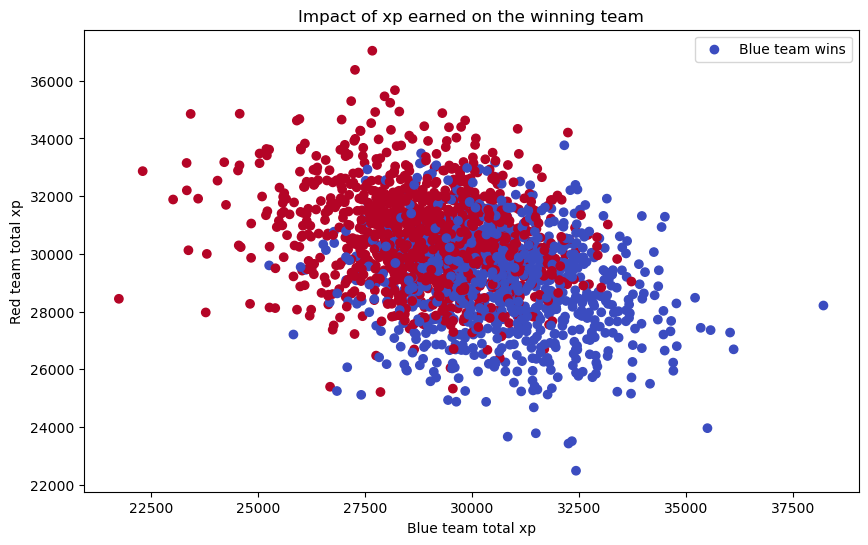

In [48]:
#Impact of total xp earned on the winning team
plot_custom_graph('Impact of xp earned on the winning team', data_sample, 'xp', 'Blue team total xp', 'Red team total xp')

It seems that the experience points earned is important 

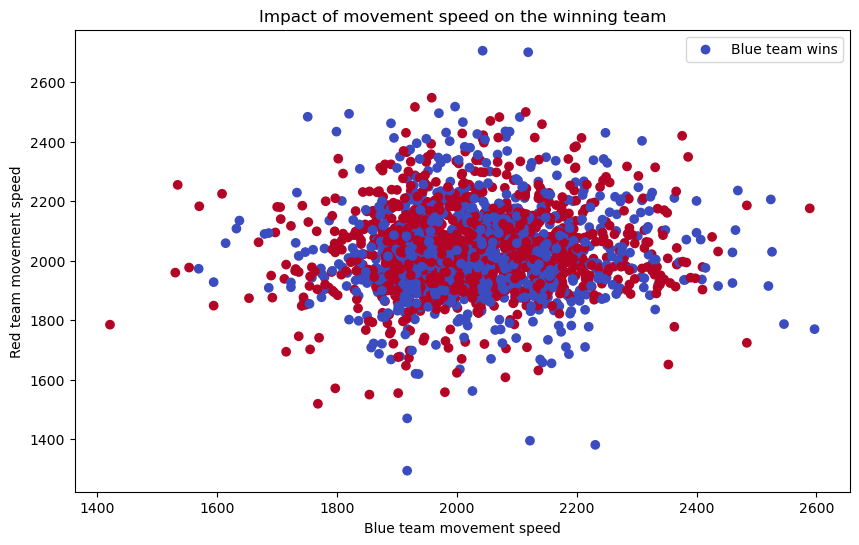

In [49]:
plot_custom_graph('Impact of movement speed on the winning team', data_sample, 'championStats.movementSpeed', 'Blue team movement speed', 'Red team movement speed')

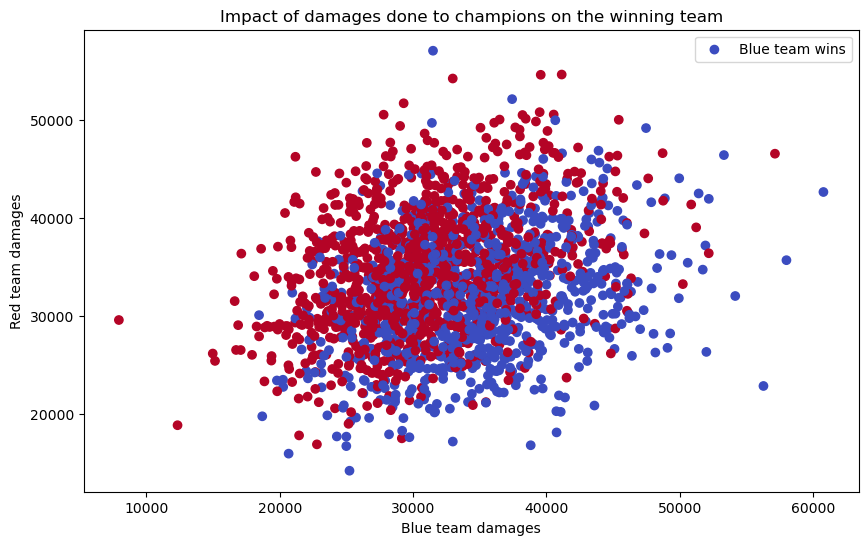

In [50]:
plot_custom_graph('Impact of damages done to champions on the winning team', data_sample, 'damageStats.totalDamageDoneToChampions', 'Blue team damages', 'Red team damages')

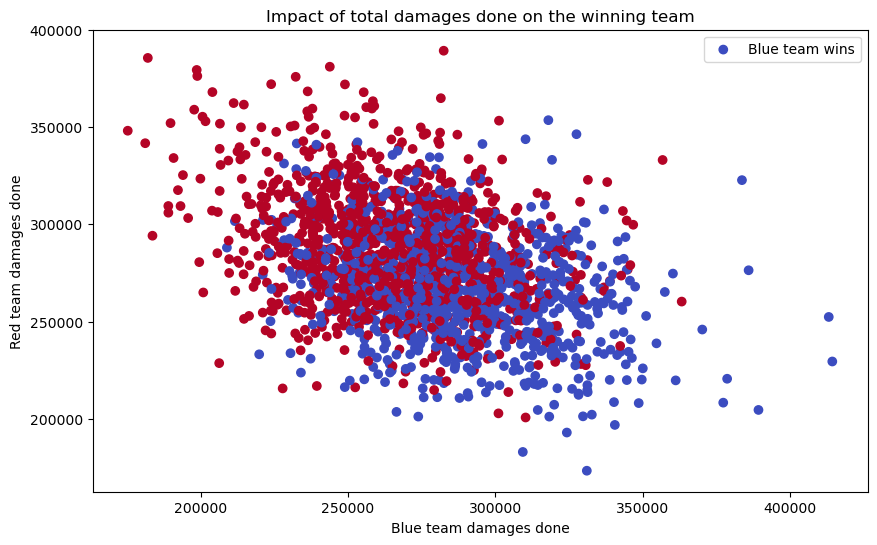

In [51]:
plot_custom_graph('Impact of total damages done on the winning team', data_sample, 'damageStats.totalDamageDone', 'Blue team damages done', 'Red team damages done')

# Jalon 2

Nous voulons faire une régression logistique pénalisée.

Ce choix se justifie car nous cherchons a predire une variable qualitative binaire.

Pour les hyperparametres, nous allons utiliser une gridSearch pour selectionner les meilleurs hyperparametres.

Ceux-ci sont:

-la penalite

-l'inverse de la force de regularisation, C

-le nombre d'iterations maximal

-le ratio entre l1 et l2 pour l'elasticNet

Nous n'utilisons pas un randomSearch pour les hyperparametres car il n'y a pas tant de valeurs a tester.

Pour ajuster nos hyperparametres, nous utilisons plusieurs cross-validations:

-Une, en interne, pour la selection des hyperparametres

-Une, en externe, pour l'evaluation de la generalisation de notre model

On compare donc par cross-validation la generalisation de plusieurs hyperparametres, eux-meme selectionnes par cross-validation.

Pour cela, on a separe nos donnees plusieurs fois en train, validation et test set.

In [24]:
data = pd.read_csv('data_15min_final.csv')
target = data['winningTeam']
data.drop(columns='winningTeam', inplace=True)

In [25]:
data

,Team1.championStats.abilityHaste,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.armorPen,Team1.championStats.armorPenPercent,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.bonusArmorPenPercent,Team1.championStats.bonusMagicPenPercent,Team1.championStats.ccReduction,...,Team2.goldPerSecond,Team2.jungleMinionsKilled,Team2.level,Team2.minionsKilled,Team2.participantId,Team2.position.x,Team2.position.y,Team2.timeEnemySpentControlled,Team2.totalGold,Team2.xp
0,0,177,352,0,0,628,817,0,0,71,...,50,100,47,421,40,58227,25880,1049805,24603,29860
1,0,185,446,0,0,551,618,0,0,0,...,50,95,46,402,40,44645,41057,395210,27729,30281
2,0,186,466,0,0,603,826,0,0,30,...,50,104,49,389,40,39313,27933,730043,31166,31966
3,0,195,307,0,0,746,945,0,0,30,...,50,107,48,385,40,43743,50106,957390,30368,32863
4,0,230,348,0,30,759,635,0,0,67,...,50,83,46,370,40,49966,24051,725235,28765,29713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0,334,307,0,0,867,512,0,0,19,...,50,90,46,369,40,50322,38622,850247,25296,29973
9814,0,225,362,0,0,664,692,0,0,18,...,50,101,47,366,40,42486,54985,568203,29257,30016
9815,0,456,380,0,0,817,818,0,0,0,...,50,76,42,352,40,58954,56762,152030,27287,25950
9816,0,188,393,0,0,651,798,0,0,10,...,50,88,47,325,40,15059,48839,452886,28472,30051


In [26]:
#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Création du pipeline avec StandardScaler et Logistic Regression
pip = make_pipeline(StandardScaler(), LogisticRegression())

# Définition des paramètres à rechercher
parameters = {'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'], #l1 pour Lasso, l2 pour Ridge
              'logisticregression__l1_ratio': [0.1, 0.5, 0.9],  #Ratio de mélange de la régularisation (0 = l2, 1 = l1)
              'logisticregression__C': [0.1, 1, 10, 100, 1000],
              'logisticregression__max_iter' : [10, 100, 1000, 2500, 5000]}  # Valeurs de régularisation

grid_search = GridSearchCV(pip, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)



In [59]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    grid_search, data, target, cv=5, n_jobs=-1, return_estimator=True
)

In [61]:
for cv_fold, estimator_in_fold in enumerate(cv_results["estimator"]):
    print(
        f"Best hyperparameters for fold #{cv_fold + 1}:\n"
        f"{estimator_in_fold.best_params_}"
    )

Best hyperparameters for fold #1:
{'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 10, 'logisticregression__penalty': 'l2'}
Best hyperparameters for fold #2:
{'logisticregression__C': 1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2'}
Best hyperparameters for fold #3:
{'logisticregression__C': 10, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2'}
Best hyperparameters for fold #4:
{'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 10, 'logisticregression__penalty': 'l2'}
Best hyperparameters for fold #5:
{'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 10, 'logisticregression__penalty': 'l2'}


On vois que le meilleur choix de penalite est la penalite Lasso (l2).

Aussi, on selectionne des valeures basses pour C et le nombre max d'iterations.

On peut ignorer l1_ratio car la penalite elasticNet n'est pas la meilleure

# Performances sur le jeu de donnees test

In [64]:
cv_results = pd.DataFrame(cv_results)
print(cv_results[["fit_time", "score_time", "test_score"]])


     fit_time  score_time  test_score
0  322.425234    0.018946    0.760183
1  324.393318    0.015957    0.759674
2  326.270183    0.008487    0.752546
3  318.741579    0.033061    0.769231
4  316.547396    0.055680    0.771268


In [66]:

cv_test_scores = cv_results["test_score"]
print(
    "Generalization score with hyperparameters tuning:\n"
    f"{cv_test_scores.mean():.3f} ± {cv_test_scores.std():.3f}"
)

Generalization score with hyperparameters tuning:
0.763 ± 0.008


On voit avec notre model generalise bien car la variance est faible.
